In [6]:
# only necessary once:
!mkdir -p data/
!curl \
    https://zenodo.org/record/4650317/files/trajectories_stokes_subset_10000.csv.gz \
    -o data/trajectories_stokes_subset_10000.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  244M  100  244M    0     0  9890k      0  0:00:25  0:00:25 --:--:--  9.9M


In [8]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from functools import reduce

In [2]:
def convert_formats_to_datetimes(col, formats):
    out = [pd.to_datetime(col, format=x, errors='coerce',utc= True).dt.date for x in formats]
    return reduce(lambda l,r: pd.Series.combine_first(l,r), out)
formats = ['%Y-%m-%d','%Y-%m-%d %H:%M:%S']

In [3]:
def load_and_subset_trajectories(file_name, num_traj=300):

    df = pd.read_csv(file_name)
    #drop missing value
    df = df.dropna()
    df = df.reset_index(drop=True)
    # the whole dataset is too big to open here.
    # Let's subset to fewer random trajectories:
#     for i in df:
#         if df['land']>0 and df['temp'] !=0:
#             df['temp'] = 0
    df = df.loc[(df["land"] > 0) & (df["temp"] != 0)] #drop rows that land > 0 and temp is not 0
    df["time"] = df["time"].pipe(convert_formats_to_datetimes, formats)
    
   #choose random trajectories 
    random_trajs = np.random.choice(
        np.unique(df["traj"]), num_traj, replace=False
    )
    traj_mask = df["traj"].apply(lambda x: x in random_trajs)
    df = df[traj_mask]
   #choose trajectories based on certain period of time
    
    
    return df

In [4]:
df_stokes = load_and_subset_trajectories(
    "data/trajectories_stokes_subset_10000.csv.gz"
)
df_stokes

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
10385,1,364,1.0,0.304842,0.026733,43.313614,5.174630,23.178467,2017-06-23,1.018237
11195,1,1174,1.0,0.171110,0.000286,43.303080,5.333345,18.103256,2017-06-10,1.018237
11650,1,1629,3.0,0.515450,0.025268,42.353115,3.282102,12.920692,2017-03-16,1.018237
11680,1,1659,3.0,0.944255,0.101813,42.233410,3.225156,21.194883,2017-07-19,1.018237
11894,1,1873,3.0,0.296078,0.001099,42.229214,3.278579,22.579762,2017-06-21,1.018237
...,...,...,...,...,...,...,...,...,...,...
9640139,961,9958,9.0,66.424010,0.999864,36.812992,-2.250006,0.002313,2017-04-25,1.018237
9640144,961,9963,10.0,69.930374,0.996702,37.395450,-1.651660,0.060235,2017-05-06,1.018237
9640162,961,9981,10.0,105.830850,0.999900,37.538937,-1.416659,0.002318,2017-06-14,1.018237
9640169,961,9988,10.0,59.222748,0.285086,36.824380,-2.526182,12.981494,2017-06-30,1.018237


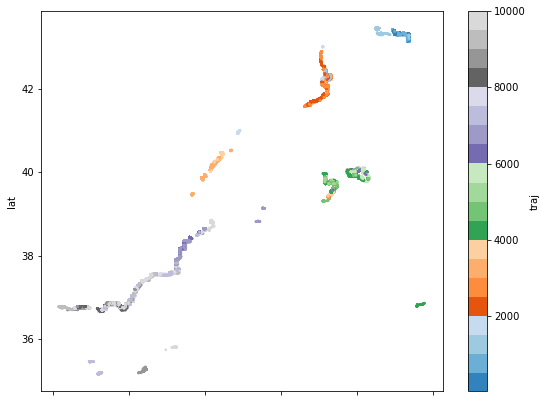

In [6]:
df_stokes.plot.scatter(
    x="lon", y="lat", s=3,
    c="traj", cmap="tab20c",
    figsize=(9, 7)
);

In [21]:
df_stokes.to_csv("random_data_2.csv")

In [37]:
new_df = pd.read_csv("random_data_2.csv")
new_df

,Unnamed: 0,obs,traj,MPA,distance,land,lat,lon,temp,time,z
0,10158,1,137,1.0,1.798529,0.066164,43.323772,5.010191,12.442608,2017-03-07,1.018237
1,10988,1,967,1.0,0.213313,0.029296,43.313720,5.252694,16.785170,2017-05-24,1.018237
2,11009,1,988,1.0,0.139261,0.002472,43.312603,5.083261,14.205615,2017-03-27,1.018237
3,11071,1,1050,1.0,1.567839,0.081113,43.334404,5.006429,11.980371,2017-03-01,1.018237
4,11796,1,1775,3.0,0.696892,0.035198,42.348465,3.322618,13.216121,2017-03-12,1.018237
...,...,...,...,...,...,...,...,...,...,...,...
208108,9640163,961,9982,10.0,421.864470,0.994690,35.812720,-0.203522,0.121868,2017-06-17,1.018237
208109,9640165,961,9984,10.0,145.260700,0.999848,37.177345,-1.833327,0.003694,2017-06-21,1.018237
208110,9640168,961,9987,10.0,47.049720,0.999822,36.827230,-2.583322,0.004397,2017-06-27,1.018237
208111,9640177,961,9996,9.0,175.261490,0.999880,36.779580,-2.083328,0.003044,2017-07-17,1.018237


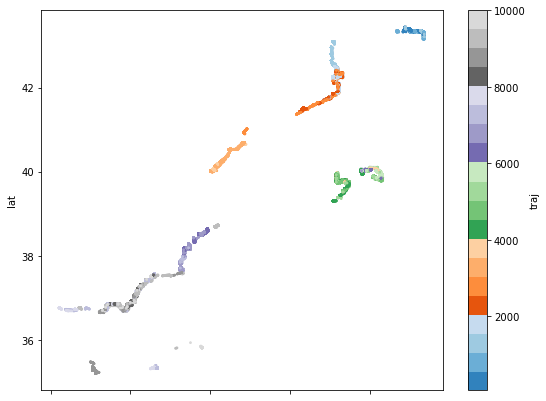

In [38]:
new_df.plot.scatter(
    x="lon", y="lat", s=3,
    c="traj", cmap="tab20c",
    figsize=(9, 7)
);

In [39]:
#df = df[df['Date'].dt.month == 11]
#df_new = new_df[new_df['time'].dt.month == 5]
new_df['time'].dtype

dtype('O')

In [40]:
#pd.to_datetime(df['Date'], format='%m/%d/%Y')
#new_df.to_datetime(new_df['time'], format='%Y-%m-%d')
#dt.to_datetime(new_df['time'], format='%Y-%m-%d')
new_df['time'] = pd.to_datetime(new_df['time'], format='%Y-%m-%d')

In [41]:
new_df

,Unnamed: 0,obs,traj,MPA,distance,land,lat,lon,temp,time,z
0,10158,1,137,1.0,1.798529,0.066164,43.323772,5.010191,12.442608,2017-03-07,1.018237
1,10988,1,967,1.0,0.213313,0.029296,43.313720,5.252694,16.785170,2017-05-24,1.018237
2,11009,1,988,1.0,0.139261,0.002472,43.312603,5.083261,14.205615,2017-03-27,1.018237
3,11071,1,1050,1.0,1.567839,0.081113,43.334404,5.006429,11.980371,2017-03-01,1.018237
4,11796,1,1775,3.0,0.696892,0.035198,42.348465,3.322618,13.216121,2017-03-12,1.018237
...,...,...,...,...,...,...,...,...,...,...,...
208108,9640163,961,9982,10.0,421.864470,0.994690,35.812720,-0.203522,0.121868,2017-06-17,1.018237
208109,9640165,961,9984,10.0,145.260700,0.999848,37.177345,-1.833327,0.003694,2017-06-21,1.018237
208110,9640168,961,9987,10.0,47.049720,0.999822,36.827230,-2.583322,0.004397,2017-06-27,1.018237
208111,9640177,961,9996,9.0,175.261490,0.999880,36.779580,-2.083328,0.003044,2017-07-17,1.018237


In [44]:
df_may = new_df[new_df['time'].dt.month == 5]
df_may

,Unnamed: 0,obs,traj,MPA,distance,land,lat,lon,temp,time,z
1,10988,1,967,1.0,0.213313,0.029296,43.313720,5.252694,16.785170,2017-05-24,1.018237
12,21009,2,967,1.0,0.405407,0.065824,43.315243,5.253824,16.183960,2017-05-24,1.018237
15,21604,2,1562,2.0,1.755429,0.002097,42.478820,3.197848,15.989707,2017-05-13,1.018237
26,27855,2,7813,9.0,0.458101,0.001254,36.729298,-2.058446,16.911247,2017-05-15,1.018237
34,31030,3,967,1.0,0.578563,0.096951,43.316540,5.255013,15.674136,2017-05-24,1.018237
...,...,...,...,...,...,...,...,...,...,...,...
208095,9639653,961,9472,10.0,79.992160,0.996412,37.437206,-1.603794,0.064346,2017-05-05,1.018237
208096,9639664,961,9483,10.0,124.312300,0.996521,36.770687,-3.271577,0.068171,2017-05-29,1.018237
208100,9639933,961,9752,10.0,151.831600,0.999912,37.502180,-1.499992,0.001576,2017-05-04,1.018237
208101,9639935,961,9754,10.0,140.333760,0.999894,36.771782,-2.624996,0.001973,2017-05-09,1.018237


In [45]:
df = pd.read_csv("data/trajectories_stokes_subset_10000.csv.gz")
#drop missing value
df = df.dropna()
df = df.reset_index(drop=True)
#drop rows that land > 0 and temp is not 0
df = df.loc[(df["land"] > 0) & (df["temp"] != 0)]
#format time column
df["time"] = df["time"].pipe(convert_formats_to_datetimes, formats)
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')



In [50]:
#split/filter data by month from march to august
march = df[df['time'].dt.month == 3]
march.to_csv('march.csv')

april = df[df['time'].dt.month == 4]
april.to_csv('april.csv')

may = df[df['time'].dt.month == 5]
may.to_csv('may.csv')

june = df[df['time'].dt.month == 6]
june.to_csv('june.csv')

july = df[df['time'].dt.month == 7]
july.to_csv('july.csv')

august = df[df['time'].dt.month == 8]
august.to_csv('august.csv')